In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load your data
df = pd.read_csv('/content/drive/MyDrive/data analytics intern/quotes_scraped.csv')

# Fill missing quotes if any
df['Quote'] = df['Quote'].fillna('')

# VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Get sentiment scores
def get_sentiment_label(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Quote'].apply(get_sentiment_label)


<ipython-input-5-e94d2b2927ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', palette='pastel')


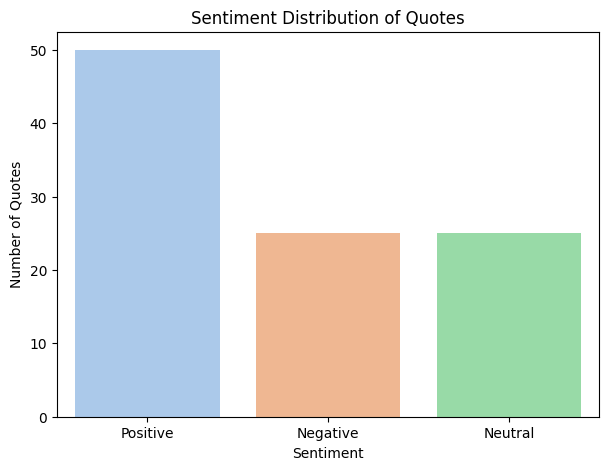

In [5]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sentiment', palette='pastel')
plt.title('Sentiment Distribution of Quotes')
plt.xlabel('Sentiment')
plt.ylabel('Number of Quotes')
plt.show()


In [6]:
# Sample quotes by sentiment
print("🟢 Positive Quote Example:\n", df[df['Sentiment'] == 'Positive']['Quote'].iloc[0])
print("\n🔴 Negative Quote Example:\n", df[df['Sentiment'] == 'Negative']['Quote'].iloc[0])
print("\n⚪ Neutral Quote Example:\n", df[df['Sentiment'] == 'Neutral']['Quote'].iloc[0])


🟢 Positive Quote Example:
 “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”

🔴 Negative Quote Example:
 “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”

⚪ Neutral Quote Example:
 “If you can't explain it to a six year old, you don't understand it yourself.”


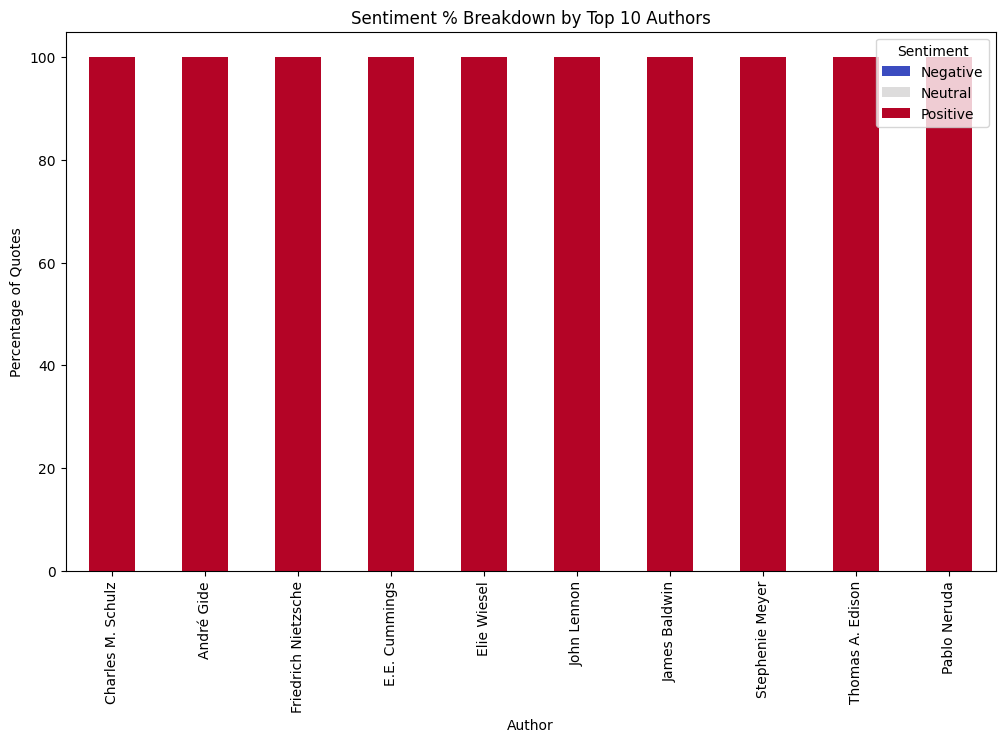

In [7]:
author_sentiment = df.groupby(['Author', 'Sentiment']).size().unstack(fill_value=0)
author_sentiment_percentage = author_sentiment.div(author_sentiment.sum(axis=1), axis=0) * 100

# Plot top 10 authors by total quotes with sentiment %
top_authors = author_sentiment_percentage.sort_values(by='Positive', ascending=False).head(10)

top_authors.plot(kind='bar', stacked=True, figsize=(12,7), colormap='coolwarm')
plt.title('Sentiment % Breakdown by Top 10 Authors')
plt.xlabel('Author')
plt.ylabel('Percentage of Quotes')
plt.legend(title='Sentiment')
plt.show()


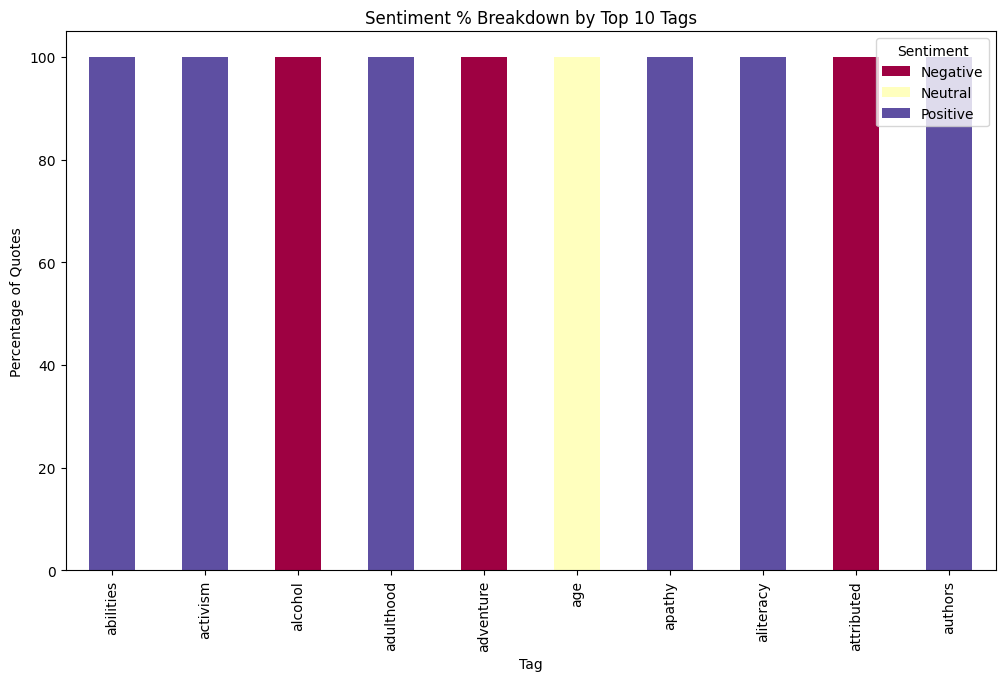

In [8]:
# Explode tags
df['Tags'] = df['Tags'].fillna('')
df_exp = df.assign(Tag=df['Tags'].str.split(', ')).explode('Tag')

tag_sentiment = df_exp.groupby(['Tag', 'Sentiment']).size().unstack(fill_value=0)
tag_sentiment_percentage = tag_sentiment.div(tag_sentiment.sum(axis=1), axis=0) * 100

# Plot top 10 tags by number of quotes
top_tags = tag_sentiment_percentage.loc[tag_sentiment_percentage.sum(axis=1).sort_values(ascending=False).index[:10]]

top_tags.plot(kind='bar', stacked=True, figsize=(12,7), colormap='Spectral')
plt.title('Sentiment % Breakdown by Top 10 Tags')
plt.xlabel('Tag')
plt.ylabel('Percentage of Quotes')
plt.legend(title='Sentiment')
plt.show()


In [9]:
def sentiment_emoji(sent):
    if sent == 'Positive':
        return '💚'
    elif sent == 'Neutral':
        return '😐'
    else:
        return '❤️‍🔥'

df['Sentiment_Emoji'] = df['Sentiment'].apply(sentiment_emoji)

# Show sample with emojis
print(df[['Quote', 'Sentiment', 'Sentiment_Emoji']].head(5).to_string(index=False))


                                                                                                                              Quote Sentiment Sentiment_Emoji
                “The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”  Positive               💚
                                              “It is our choices, Harry, that show what we truly are, far more than our abilities.”  Positive               💚
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”  Negative            ❤️‍🔥
                           “The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”  Positive               💚
                    “Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”  Positive               💚
